In [78]:
!pip install opendatasets
!pip install pandas
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
import opendatasets as od
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
od.download("https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/code")

In [80]:
data = pd.read_csv("student-performance-multiple-linear-regression/Student_Performance.csv")

In [81]:
data.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [82]:
data.shape

(10000, 6)

Remove duplicates

In [83]:
data.drop_duplicates(inplace=True)

In [84]:
data.shape

(9873, 6)

Change Extra Activities column to int

In [85]:
data["Extracurricular Activities"] = data["Extracurricular Activities"].replace({'Yes': 1, 'No': 0})

C:\Users\Arden\AppData\Local\Temp\ipykernel_9200\3312621466.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Extracurricular Activities"] = data["Extracurricular Activities"].replace({'Yes': 1, 'No': 0})


Data exploration

In [86]:
hours_studied = data["Hours Studied"]
hours_studied.dtype

dtype('int64')

<Axes: xlabel='Hours Studied', ylabel='Count'>

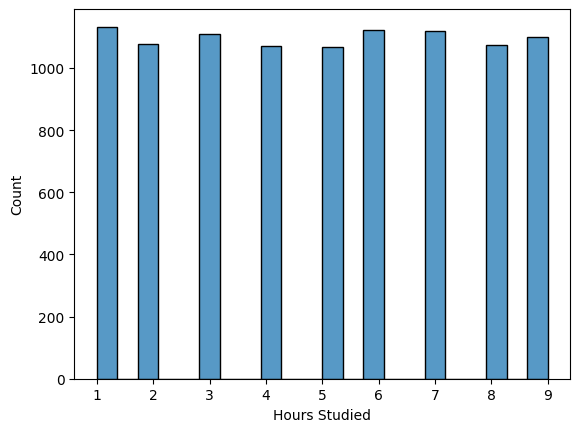

In [87]:
sns.histplot(hours_studied)

In [88]:
hours_studied.describe()

count    9873.000000
mean        4.992100
std         2.589081
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Hours Studied, dtype: float64

In [89]:
previous_score = data["Previous Scores"]
previous_score.dtype

dtype('int64')

<Axes: xlabel='Previous Scores', ylabel='Count'>

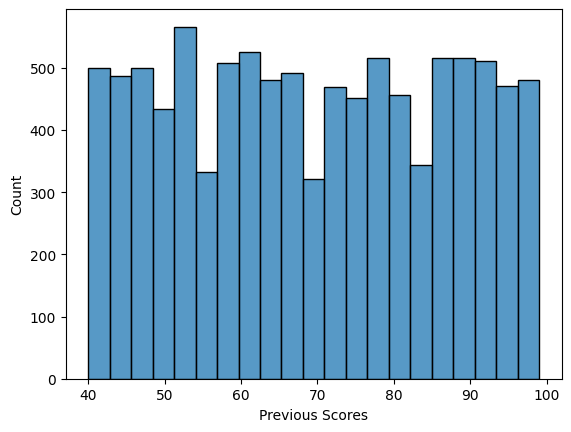

In [90]:
sns.histplot(previous_score)

In [91]:
extra_activities = data['Extracurricular Activities']
extra_activities.dtype

dtype('int64')

<Axes: xlabel='Extracurricular Activities', ylabel='Count'>

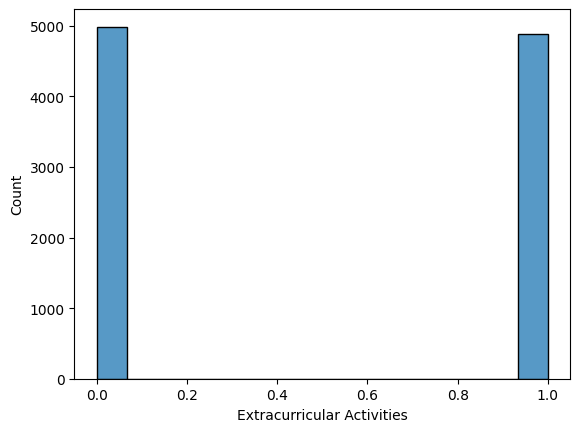

In [92]:
sns.histplot(extra_activities)

In [93]:
sleep_hours = data['Sleep Hours']
sleep_hours.dtype

dtype('int64')

<Axes: xlabel='Sleep Hours', ylabel='Count'>

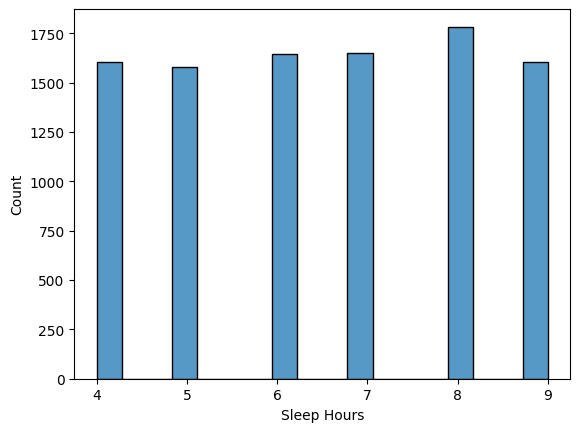

In [94]:
sns.histplot(sleep_hours)

In [95]:
samples_practised = data["Sample Question Papers Practiced"]
samples_practised.dtype

dtype('int64')

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Count'>

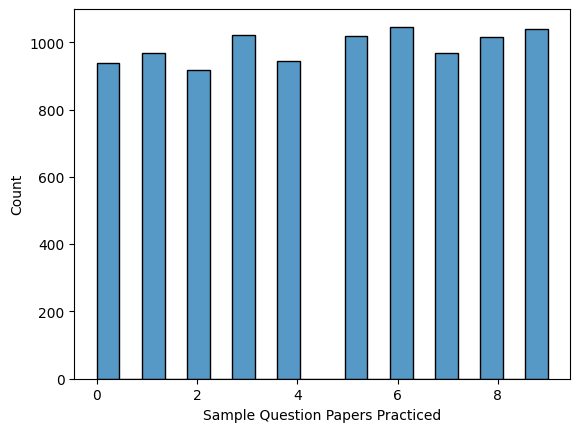

In [96]:
sns.histplot(samples_practised)

In [97]:
performance = data["Performance Index"]
performance.dtype

dtype('float64')

<Axes: xlabel='Performance Index', ylabel='Count'>

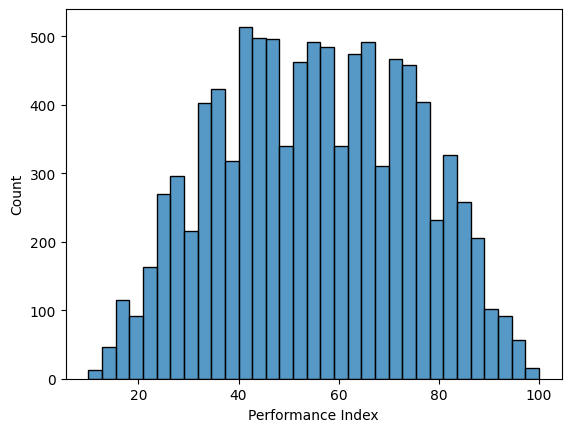

In [98]:
sns.histplot(performance)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

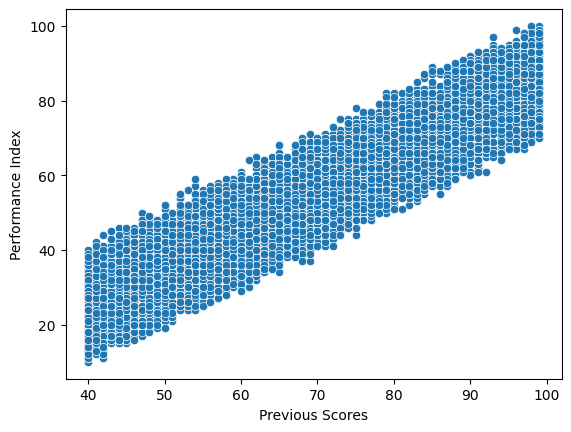

In [99]:
sns.scatterplot(x=previous_score,y=performance)

In [100]:
data.describe().T

count       mean        std   min   25%  \
Hours Studied                     9873.0   4.992100   2.589081   1.0   3.0   
Previous Scores                   9873.0  69.441102  17.325601  40.0  54.0   
Extracurricular Activities        9873.0   0.494986   0.500000   0.0   0.0   
Sleep Hours                       9873.0   6.531652   1.697683   4.0   5.0   
Sample Question Papers Practiced  9873.0   4.583004   2.867202   0.0   2.0   
Performance Index                 9873.0  55.216651  19.208570  10.0  40.0   

                                   50%   75%    max  
Hours Studied                      5.0   7.0    9.0  
Previous Scores                   69.0  85.0   99.0  
Extracurricular Activities         0.0   1.0    1.0  
Sleep Hours                        7.0   8.0    9.0  
Sample Question Papers Practiced   5.0   7.0    9.0  
Performance Index                 55.0  70.0  100.0

<Axes: >

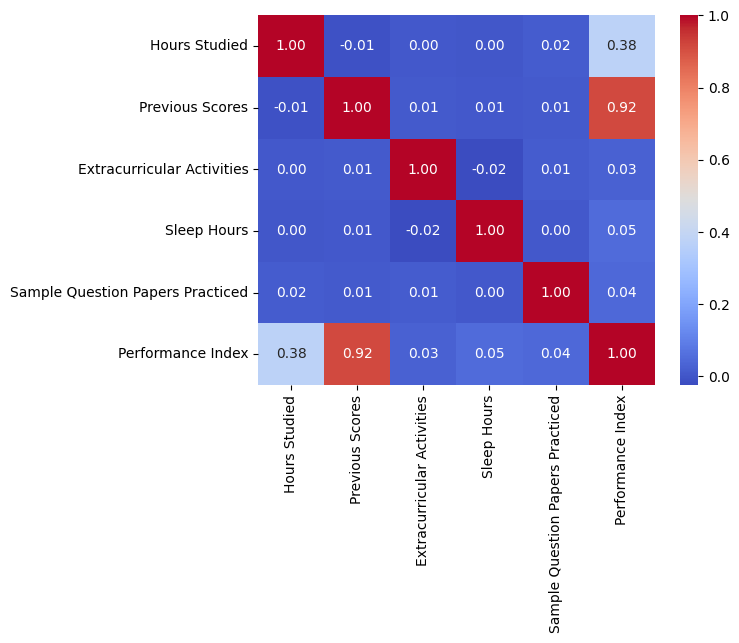

In [101]:
correlation_matrix = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Data standarization to normal distribution

In [102]:
X = data.drop("Performance Index", axis=1)
y = data["Performance Index"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [104]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [105]:
X_train_scaled = scaler.transform(X_train)

In [106]:
X_test_scaled = scaler.transform(X_test)

In [107]:
X_train_scaled

array([[ 0.77824248,  0.02642469, -0.98691768, -1.48058947,  0.84637542],
       [-0.77049682, -1.58829235,  1.01325574,  0.87108386,  1.54382162],
       [-0.77049682,  0.48777241, -0.98691768,  1.45900219,  0.14892922],
       ...,
       [ 0.00387283,  1.179794  , -0.98691768, -0.89267114, -1.24596317],
       [ 1.16542731, -1.70362928, -0.98691768,  0.28316553,  0.84637542],
       [-0.77049682,  0.89145167,  1.01325574, -0.89267114, -0.89724007]])

# Evaluation

In [108]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [109]:
import numpy

# Predicting Test Set Results
y_pred = regressor.predict(X_test_scaled)
y_pred = numpy.round(y_pred, decimals = 2)

In [110]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mean_er = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : ', mean_er)
print('R Square : ', r2)

Mean Squared Error :  4.213380000000001
R Square :  0.9888499650063397


In [111]:
pd.DataFrame({'Actual Performance': y_test, 'Predicted Performance': y_pred})

Actual Performance  Predicted Performance
4288                31.0                  29.19
5077                62.0                  59.85
3955                16.0                  16.21
9149                73.0                  73.85
3089                44.0                  45.14
...                  ...                    ...
4791                35.0                  39.65
1750                48.0                  48.94
8441                75.0                  74.65
9143                67.0                  65.49
2522                51.0                  47.46

[1975 rows x 2 columns]